## Extract Image features using resnet

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

Using TensorFlow backend.


In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [3]:
from io import BytesIO
import urllib

In [4]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input

In [5]:
model = ResNet50(weights='imagenet', include_top=False,pooling='avg',
                 input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [82]:

def extract_features(img_path):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path,target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    normalized_features = normalized_features.reshape((1,2048))
    return normalized_features

In [7]:
data= pd.read_csv("C:/Users/sandeep/projects/DataToDB/data.csv")

In [50]:
data.head()

,Unnamed: 0,asin,brand,product_type_name,title,color,formatted_price,medium_image_url
0,0,B004GSI2OS,FeatherLite,SHIRT,featherlite ladies long sleeve stain resistant...,Onyx Black/ Stone,26.26,https://images-na.ssl-images-amazon.com/images...
1,1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,SHIRT,womens unique 100 cotton special olympics wor...,White,9.99,https://images-na.ssl-images-amazon.com/images...
2,2,B003BSRPB0,FeatherLite,SHIRT,featherlite ladies moisture free mesh sport sh...,White,20.54,https://images-na.ssl-images-amazon.com/images...
3,3,B014ICEJ1Q,FNC7C,SHIRT,supernatural chibis sam dean castiel neck tshi...,Purple,7.39,https://images-na.ssl-images-amazon.com/images...
4,4,B01NACPBG2,Fifth Degree,SHIRT,fifth degree womens gold foil graphic tees jun...,Black,6.95,https://images-na.ssl-images-amazon.com/images...


In [68]:
data.shape

(10000, 9)

In [34]:
filenames = pickle.load(open('Datafromvscode/filenames.pickle', 'rb'))

In [71]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(filename)
                counter += 1
    return file_list

In [72]:
root_dir = '16k_images'
filenames = get_file_list(root_dir)

In [73]:
len(filenames)

16033

In [74]:
filenames_dictionary ={}

In [75]:
for imname in tqdm_notebook(filenames):
    imNameExt = imname.split(".")
    filenames_dictionary[imNameExt[0]] = imname

In [52]:
data["image"] = [0 for i in range(10000)]

In [76]:
na = []
for i in tqdm_notebook(range(data.shape[0])):
    if data.iloc[i,1] in filenames_dictionary.keys():
        data.iloc[i,8]=filenames_dictionary[data.iloc[i,1]]       
    else:        
        na.append(i)

In [77]:
na

[1484, 2325, 2403, 3058, 5366, 7693, 8458, 9185, 9266]

In [79]:
data.drop(na,inplace=True)

In [81]:
data.shape

(9991, 9)

In [83]:
data.reset_index(drop=True, inplace=True)

In [84]:
data.head()

,Unnamed: 0,asin,brand,product_type_name,title,color,formatted_price,medium_image_url,image
0,0,B004GSI2OS,FeatherLite,SHIRT,featherlite ladies long sleeve stain resistant...,Onyx Black/ Stone,26.26,https://images-na.ssl-images-amazon.com/images...,B004GSI2OS.jpeg
1,1,B012YX2ZPI,HX-Kingdom Fashion T-shirts,SHIRT,womens unique 100 cotton special olympics wor...,White,9.99,https://images-na.ssl-images-amazon.com/images...,B012YX2ZPI.jpeg
2,2,B003BSRPB0,FeatherLite,SHIRT,featherlite ladies moisture free mesh sport sh...,White,20.54,https://images-na.ssl-images-amazon.com/images...,B003BSRPB0.jpeg
3,3,B014ICEJ1Q,FNC7C,SHIRT,supernatural chibis sam dean castiel neck tshi...,Purple,7.39,https://images-na.ssl-images-amazon.com/images...,B014ICEJ1Q.jpeg
4,4,B01NACPBG2,Fifth Degree,SHIRT,fifth degree womens gold foil graphic tees jun...,Black,6.95,https://images-na.ssl-images-amazon.com/images...,B01NACPBG2.jpeg


In [ ]:
feature_list =[]
for i in tqdm_notebook(range(data.shape[0])):
    file_dir = '16k_images/'+ data.iloc[i,8]
    feature_list.append(extract_features(file_dir))

In [32]:
pickle.dump(feature_list, open('Datafromvscode/features.pickle', 'wb'))

In [26]:
import pickle

In [27]:
filenames = pickle.load(open('Datafromvscode/filenames.pickle', 'rb'))

In [28]:
filenames.shape

(15977,)

In [55]:
def get_similar_products_new(img_path1, num_results):
   
    fv = extract_features(img_path1)
    pairwise_dist = pairwise_distances(feature_list_cnn_arr, fv)
    
    print(pairwise_dist)
    print(pairwise_dist*5)
    print(pairwise_dist + pairwise_dist*5)
    #indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    #returnlist = []
    #for i in range(len(indices)):
        #print('Euclidean Distance from input image:', pdists[i])
        #returnlist.append(filenames[indices[i]])
    #return returnlist
             

In [33]:
feature_list_cnn = pickle.load(open("Datafromvscode/features.pickle", 'rb'))

In [ ]:
feature_list_cnn

In [41]:
feature_list_cnn_arr =np.array(feature_list_cnn)

In [46]:
feature_list_cnn_arr

array([[8.9758299e-03, 3.7126377e-02, 2.4038889e-03, ..., 1.4057080e-04,
        1.0931328e-02, 5.1448173e-03],
       [0.0000000e+00, 2.0415305e-01, 1.3339957e-02, ..., 1.4033922e-02,
        6.6300016e-03, 3.0334484e-02],
       [5.0312434e-03, 7.3632617e-03, 0.0000000e+00, ..., 7.2990060e-03,
        1.1467219e-02, 1.3996659e-02],
       ...,
       [5.1440382e-03, 6.3499510e-02, 3.3714380e-03, ..., 8.0269558e-04,
        3.5055417e-03, 2.6632460e-02],
       [2.9077467e-03, 4.4254217e-02, 2.2152924e-05, ..., 2.1175251e-03,
        0.0000000e+00, 3.0335069e-02],
       [7.9538692e-03, 1.1156995e-02, 0.0000000e+00, ..., 8.6075319e-03,
        3.9609866e-03, 5.6311902e-02]], dtype=float32)

In [44]:
feature_list_cnn_arr = feature_list_cnn_arr.reshape(15977,2048)

In [54]:
pickle.dump(feature_list_cnn_arr, open('Datafromvscode/features.pickle', 'wb'))

In [56]:
get_similar_products_new("6342521018.jpeg",30)

[[1.0465975 ]
 [1.0341723 ]
 [1.0638176 ]
 ...
 [0.9948877 ]
 [0.98661166]
 [1.0512724 ]]
[[5.2329874]
 [5.1708612]
 [5.319088 ]
 ...
 [4.9744387]
 [4.9330583]
 [5.256362 ]]
[[6.279585 ]
 [6.2050333]
 [6.3829055]
 ...
 [5.9693265]
 [5.91967  ]
 [6.3076344]]


In [8]:
import numpy

In [9]:
featureArray = numpy.array(feature_list)
featureArray = featureArray.reshape(featureArray.shape[0],2048)
pickle.dump(featureArray, open('Pickledata/features.pickle', 'wb'))
pickle.dump(filenames, open('Pickledata/filenames.pickle','wb'))

In [89]:
def get_feature(img_path1,img_path2):
    features1 = extract_features(img_path1,model)
    features1 = features1.reshape((1,2048))
    features2 = extract_features(img_path2,model)
    features2 = features2.reshape((1,2048))
    pairwise_dist = pairwise_distances(features1, features2)
    print(pairwise_dist)
    img = mpimg.imread(img_path1)
    imgplot = plt.imshow(img)
    plt.show()
    img = mpimg.imread(img_path2)
    imgplot = plt.imshow(img)
    plt.show()

In [120]:
featureArray = numpy.array(feature_list)
featureArray = featureArray.reshape(featureArray.shape[0],2048)

In [142]:
featureArray.shape[0]

2048

In [121]:
pickle.dump(featureArray, open('NewImdata/features.pickle', 'wb'))
pickle.dump(filenames, open('NewImdata/filenames.pickle','wb'))

In [45]:
feature_list = pickle.load(open('NewImdata/features.pickle', 'rb'))
filenames = pickle.load(open('NewImdata/filenames.pickle', 'rb'))

In [52]:
feature_list = pickle.load(open('Pickledata/features.pickle', 'rb'))
filenames = pickle.load(open('NewImdata/filenamesNew.pickle', 'rb'))

In [53]:
len(filenames)

16032

In [13]:
data = pd.DataFrame(filenames)

In [38]:
data.head()

,first,file
0,16k_images\0000000060.jpeg,0000000060.jpeg
1,16k_images\6042589113.jpeg,042589113.jpeg
2,16k_images\6342521018.jpeg,342521018.jpeg
3,16k_images\B00029I0Z6.jpeg,B00029I0Z6.jpeg
4,16k_images\B0006LTFTK.jpeg,B0006LTFTK.jpeg


In [39]:
pickle.dump(data["file"], open('NewImdata/filenamesNew.pickle','wb'))

In [31]:
data.columns = ["first"]

In [37]:
data["file"] = data["first"].map(lambda x: x.lstrip('16k_images\\'))

In [21]:
def get_similar_products_new(img_path1, num_results):
    
    fv = extract_features(img_path1, model)
    pairwise_dist = pairwise_distances(feature_list, fv)

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        print('Euclidean Distance from input image:', pdists[i])
        print(filenames[indices[i]])
        plt.imshow(mpimg.imread(filenames[indices[i]]))
        plt.show()        

In [127]:
filenames[0]

'new_images\\B000BTBPWW.jpeg'

Euclidean Distance from input image: 0.57095313
16k_images\B00K96KPLE.jpeg


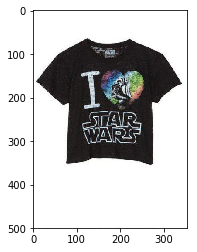

Euclidean Distance from input image: 0.6027172
16k_images\B01BFLTGB6.jpeg


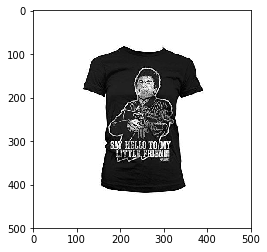

Euclidean Distance from input image: 0.6204514
16k_images\B01BFLOOVI.jpeg


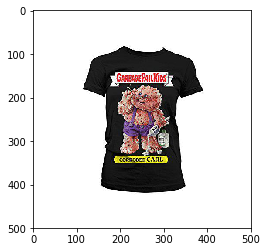

Euclidean Distance from input image: 0.6230775
16k_images\B016Y3LNWA.jpeg


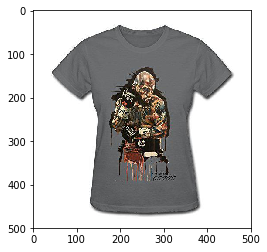

Euclidean Distance from input image: 0.62889093
16k_images\B01KYY2F8G.jpeg


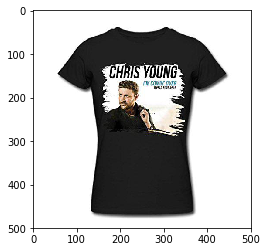

In [28]:
get_similar_products_new('Testimage/shirttiger.jpg',5)